$$Aerofit Business Case study:$$<br>
**The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Data Loading and analysing basic metrics

In [ ]:
aerofit = pd.read_csv("/content/aerofit_treadmill.csv")

In [ ]:
aerofit.columns

In [ ]:
aerofit.shape

In [ ]:
aerofit.info()

In [ ]:
aerofit.sample(5)

In [ ]:
aerofit.isnull().sum()

In [ ]:
plt.figure(figsize=(24,5))

sns.heatmap(aerofit.isnull(),cmap='Blues')
plt.title('Visual Check of Nulls',fontsize=20)
plt.show()

1. Descriptive Statistics Summary

In [ ]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Distribution Analysis:

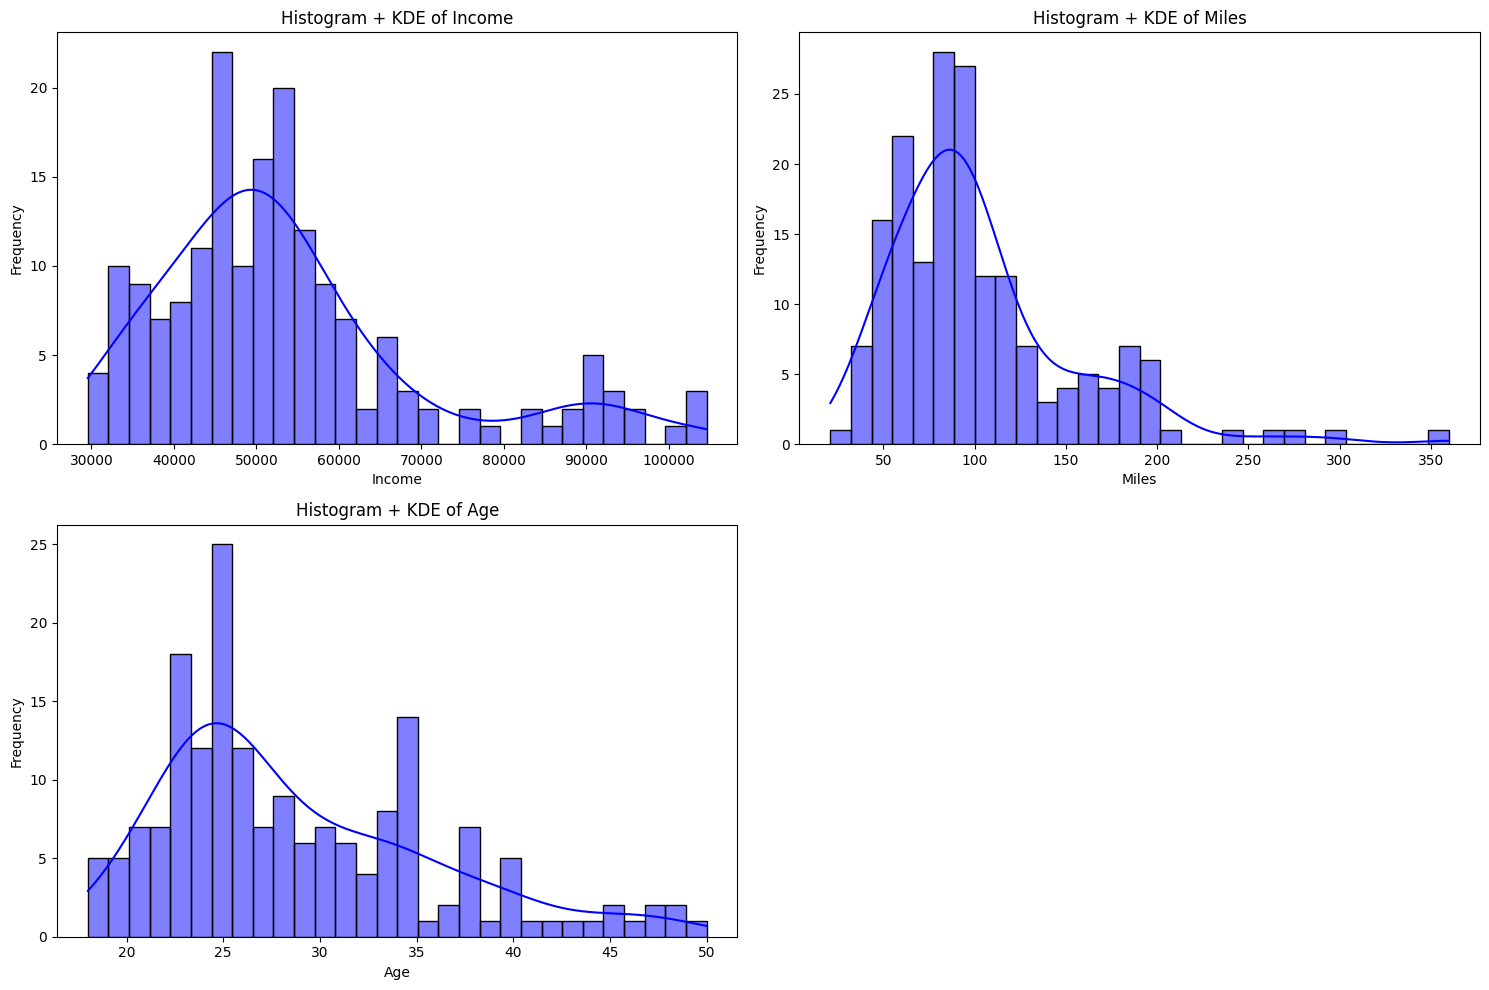

In [ ]:
import math
num_col=['Income','Miles','Age']
# for col in list(aerofit.columns):
#   if aerofit[col].dtype == 'int64' or aerofit[col].dtype =='float64':
#     num_col.append(col)
n=len(num_col)

cols = 2 if n > 1 else 1
rows = math.ceil(n / cols)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_col):
    sns.histplot(aerofit[col], kde=True, ax=axes[i], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram + KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Checking for outliers

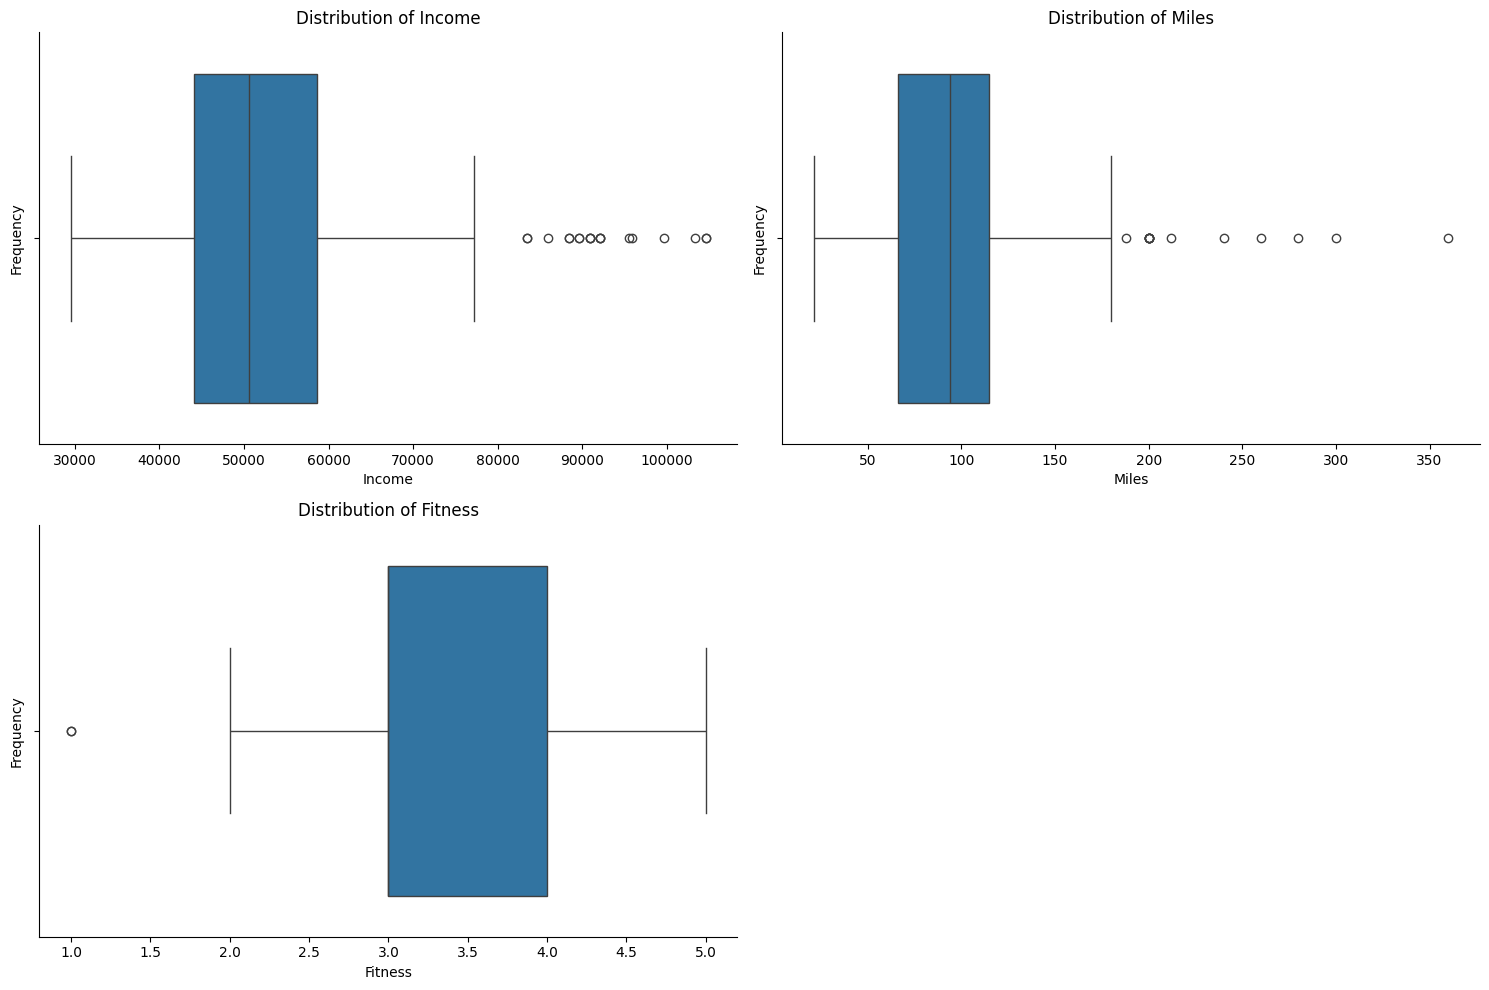

In [ ]:
num_col=['Income','Miles','Fitness']
# for col in list(aerofit.columns):
#   if aerofit[col].dtype == 'int64' or aerofit[col].dtype =='float64':
#     num_col.append(col)
n=len(num_col)

cols = 2 if n > 1 else 1
rows = math.ceil(n / cols)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(num_col):
    sns.boxplot(x=aerofit[col],data=aerofit, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

sns.despine()
plt.tight_layout()
plt.show()

**$$Univariant Analysis:$$**

1. Product: Countplot of each treadmill type

<Figure size 1000x800 with 0 Axes>

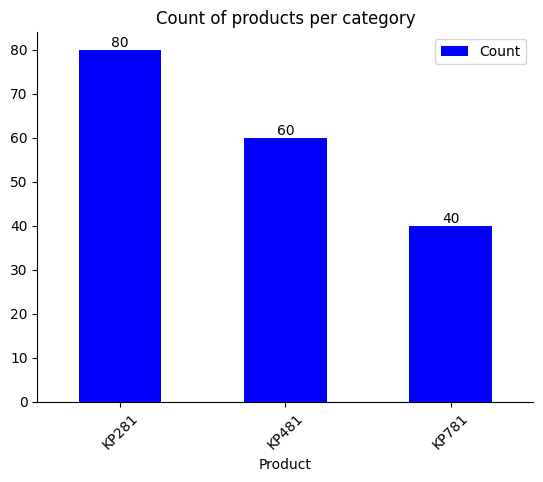

In [ ]:
plt.figure(figsize=(10,8))
product_counts = aerofit['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']
b=product_counts.plot(kind='bar', x='Product', y='Count',color='blue')

for container in b.containers:
  b.bar_label(container,fmt='%d')
plt.title('Count of products per category')

sns.despine()
plt.xticks(rotation=45)
plt.show()

2. Gender Ratio and Marital Status of Aerofit Customers

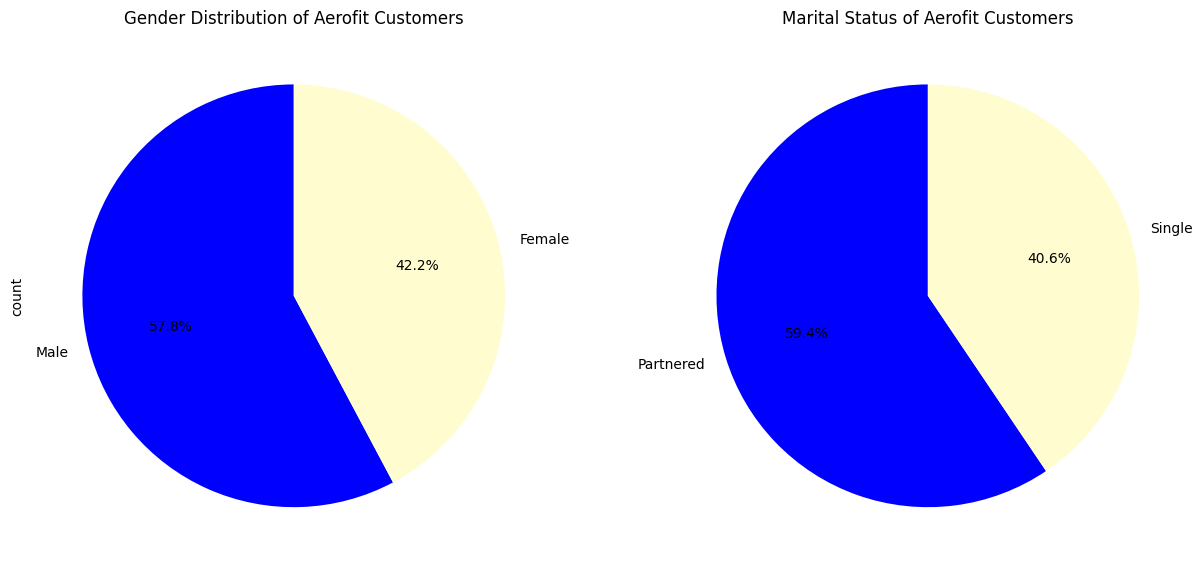

In [ ]:
gender_counts = aerofit['Gender'].value_counts()
MaritalStatus = aerofit['MaritalStatus'].value_counts()
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', '#fffdd0'])
plt.title('Gender Distribution of Aerofit Customers')

plt.subplot(1,2,2)
MaritalStatus.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', '#fffdd0'])
plt.title('Marital Status of Aerofit Customers')
plt.ylabel('')
plt.show()


In [ ]:
mean_age = aerofit.Age.mean()
mean_age

np.float64(28.788888888888888)

3. Age distribution of customers of aerofit

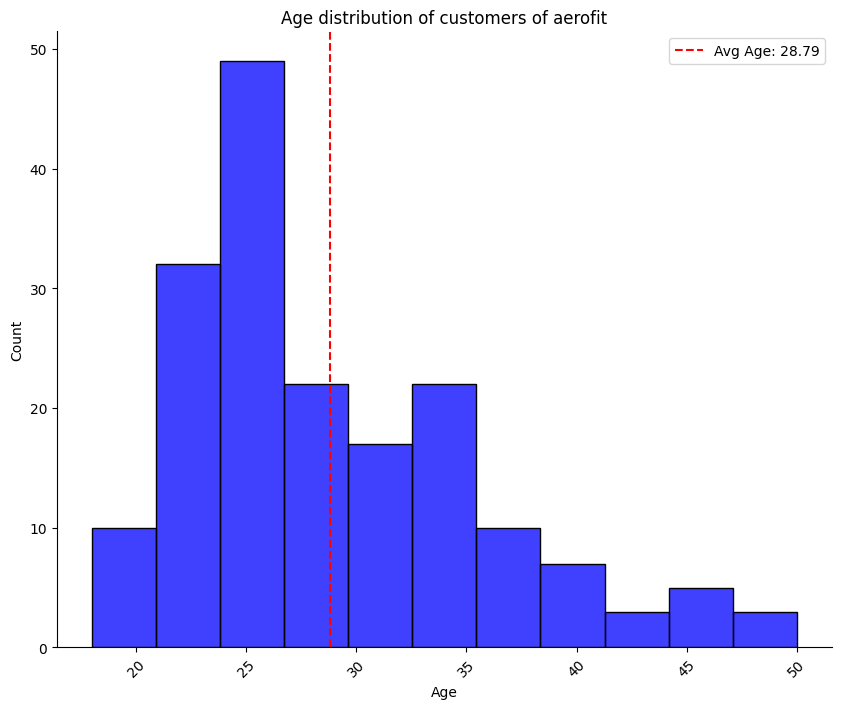

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data= aerofit, x= "Age",color ='blue')

plt.axvline(mean_age, color = "red",ls = "--",label=f'Avg Age: {mean_age:.2f}')
plt.xticks(rotation=45)
plt.title("Age distribution of customers of aerofit")
sns.despine()
plt.legend()
plt.show()

4.Miles run by the customers of aerofit

In [ ]:
avg_miles= aerofit.Miles.mean()

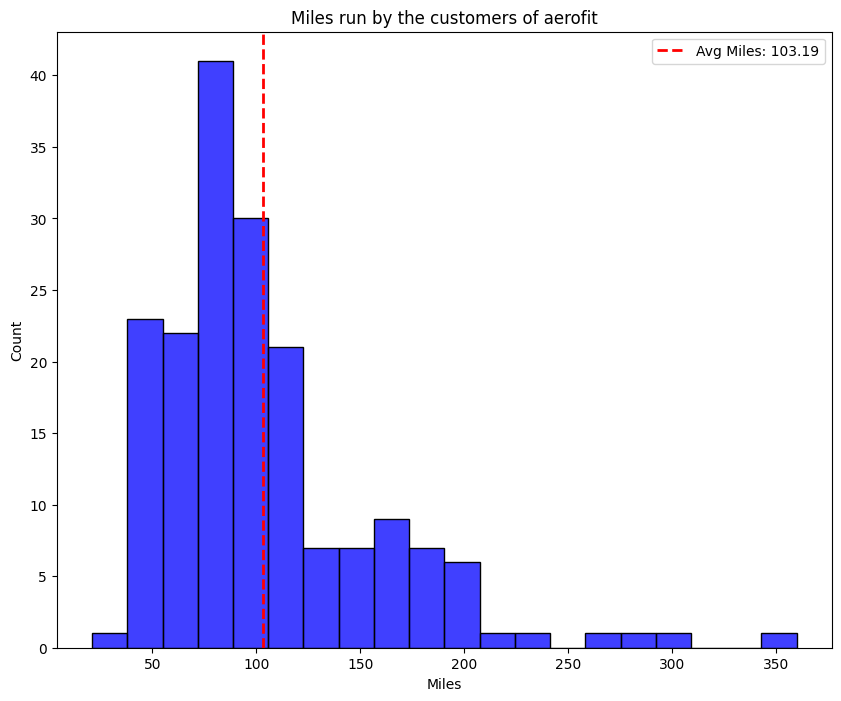

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data= aerofit,x = 'Miles',bins='auto',color='blue')
plt.axvline(avg_miles, color='red', linestyle='--', linewidth=2, label=f'Avg Miles: {avg_miles:.2f}')

plt.title("Miles run by the customers of aerofit")
plt.legend()
plt.show()

5. Education level of Aerofit Customers

In [ ]:
mean_edu_level= aerofit.Education.mean()

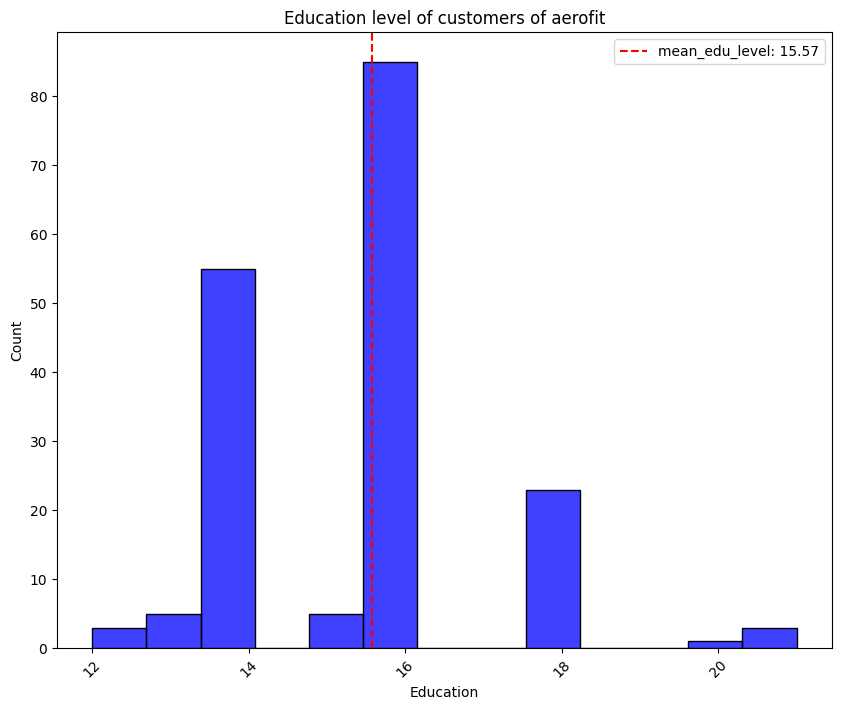

In [ ]:
plt.figure(figsize=(10,8))

sns.histplot(data= aerofit, x= "Education",color='blue',edgecolor='black')
# plt.grid(axis= "y", ls = "--")
plt.axvline(mean_edu_level, color = "red",ls = "--",label=f'mean_edu_level: {mean_edu_level:.2f}')
plt.xticks(rotation=45)
plt.title("Education level of customers of aerofit")
plt.legend()
plt.show()

**Observations:**

*   The most sold product of Aerofit is **KP281** after that KP481,KP781.
*   Gender Ratio among the customers is **male: 58% and female: 42%**.
*   Marital Status of customers is **married: 60% and unmarried: 40%**.
*   Average age of customers is less than **29 years**.
*   Average miles dones by customers of aerofit is **103.19 miles**.
*   The education level of customers of aerofit is **15.57 years**.









$$Bi-Variant Analysis:$$

1. Income vs Miles: Do higher income customers use treadmills more?

In [ ]:
avg_income = aerofit.Income.mean()
avg_miles = aerofit.Miles.mean()

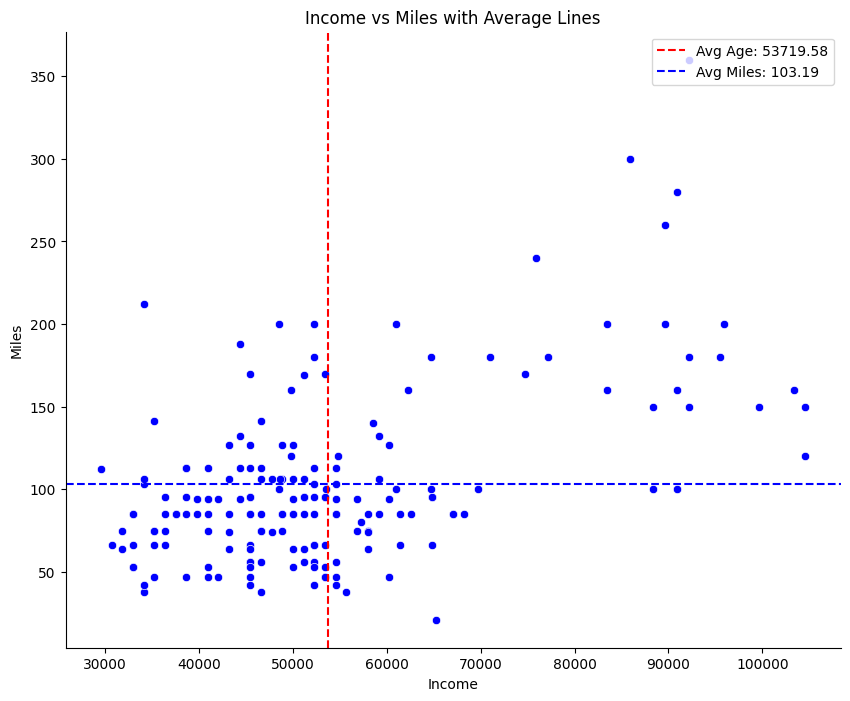

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=aerofit,x='Income',y='Miles',color='blue')
plt.axvline(avg_income, color = "red",ls = "--",label=f'Avg Age: {avg_income:.2f}')
plt.axhline(avg_miles, color="blue", linestyle="--", label=f'Avg Miles: {avg_miles:.2f}')
plt.title("Income vs Miles with Average Lines")
plt.legend(loc='upper right')
sns.despine()
plt.show()



2. Fitness vs Usage: Are fitter people using the product more?

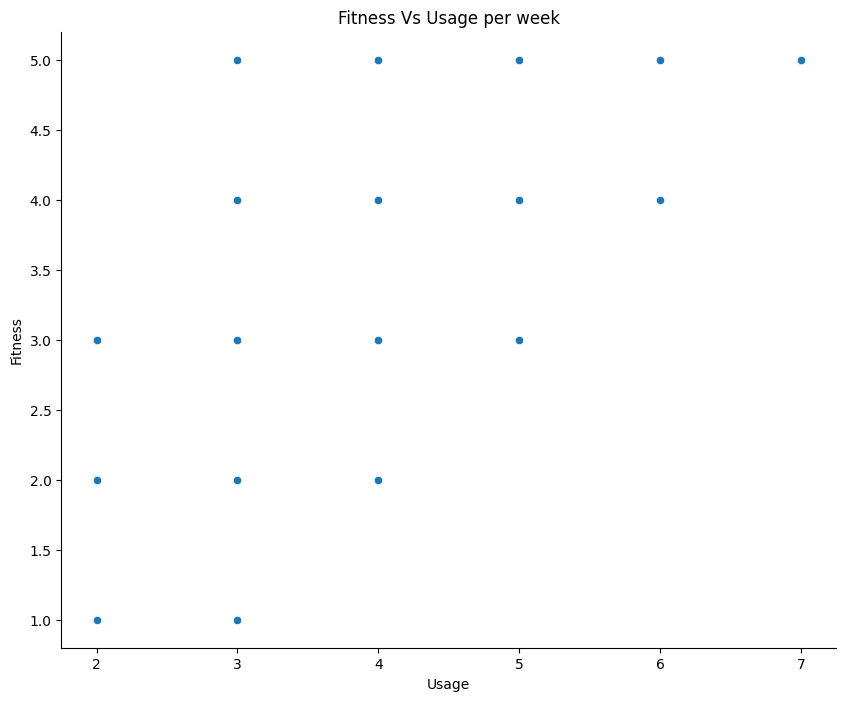

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Fitness Vs Usage per week")
sns.scatterplot(data=aerofit, x='Usage' ,y='Fitness')
sns.despine()
plt.show()


3. Age vs Usage: Are older customers using it less?

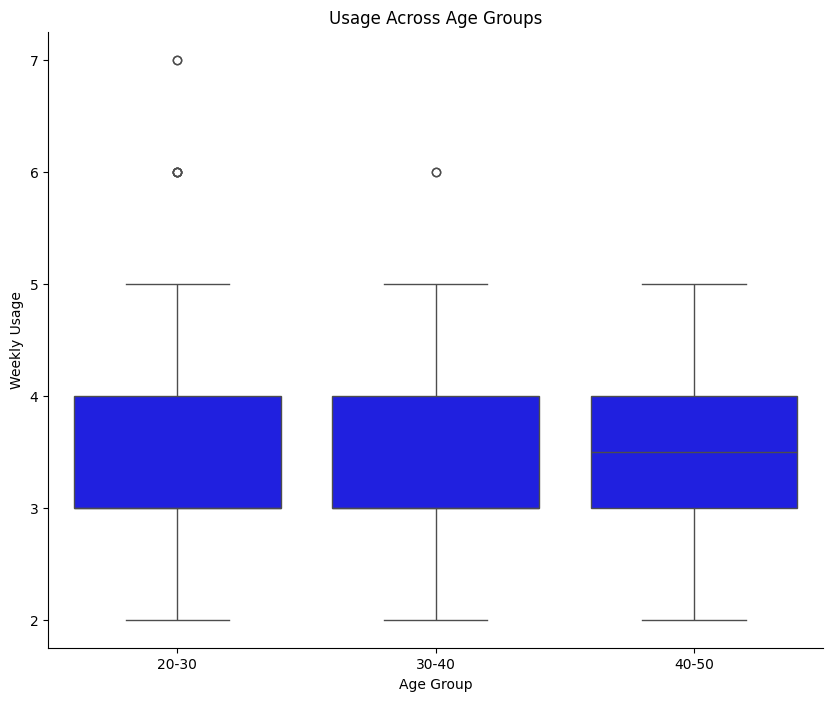

In [ ]:
plt.figure(figsize=(10,8))
aerofit['Age_Group'] = pd.cut(aerofit['Age'], bins=[20, 30, 40, 50],
                              labels=['20-30', '30-40', '40-50'])

sns.boxplot(data=aerofit, x='Age_Group', y='Usage',color='blue')
plt.title('Usage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Weekly Usage')
sns.despine()
plt.show()


4. Group by Product and compare average Miles, Income, Age



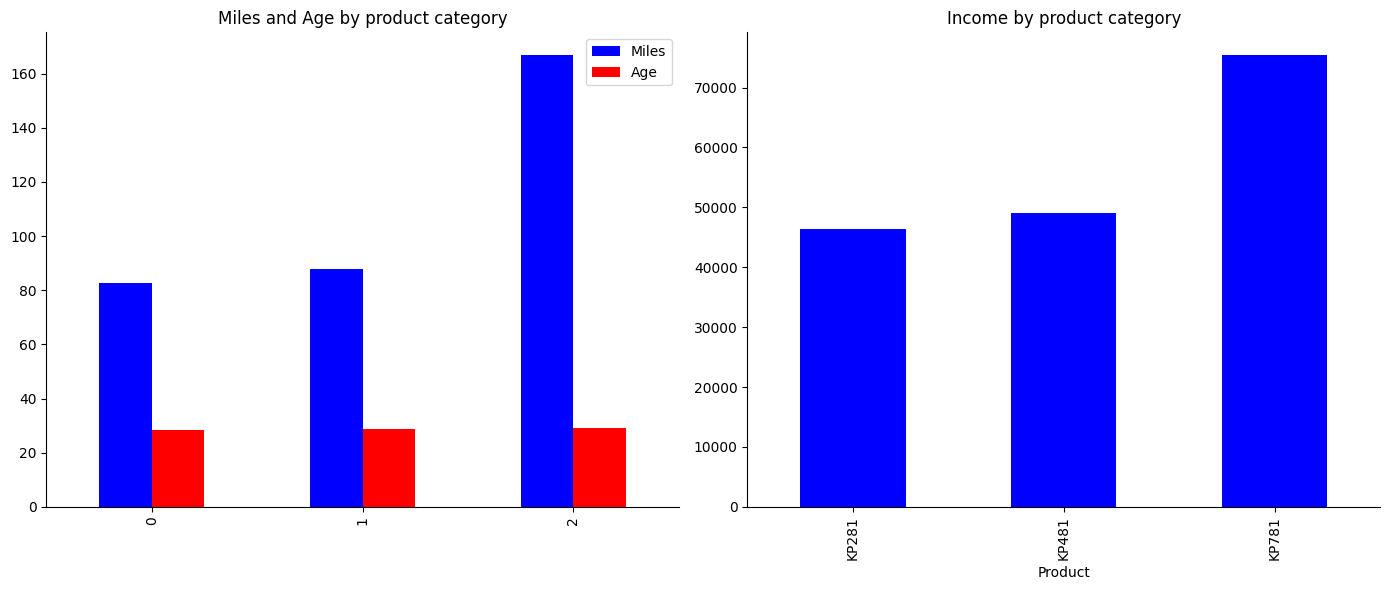

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1,2,1)
aerofit.groupby('Product')[['Miles','Age']].mean().reset_index().plot(kind='bar',ax=axes[0],color=['Blue','Red'])
axes[0].set_title('Miles and Age by product category')

plt.subplot(1,2,2)
aerofit.groupby('Product')['Income'].mean().plot(kind='bar',ax=axes[1],color='Blue')
axes[1].set_title('Income by product category')

sns.despine()
plt.tight_layout()
plt.show()

5. Marital Status of the customers of different products

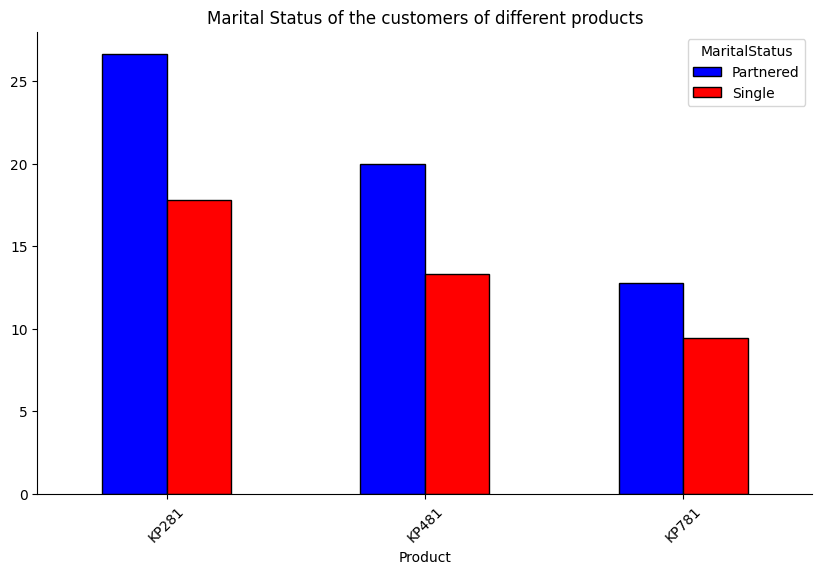

In [ ]:
df=pd.crosstab(aerofit['Product'],aerofit['MaritalStatus'],normalize= True)*100
df.head()
df.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], edgecolor='black')
plt.title("Marital Status of the customers of different products")
plt.xticks(rotation=45)
sns.despine()
plt.show()

6. Product analysis with Gender of customers

In [ ]:
df1=aerofit.groupby(['Product','Gender']).size().reset_index(name='count')
df1

,Product,Gender,count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


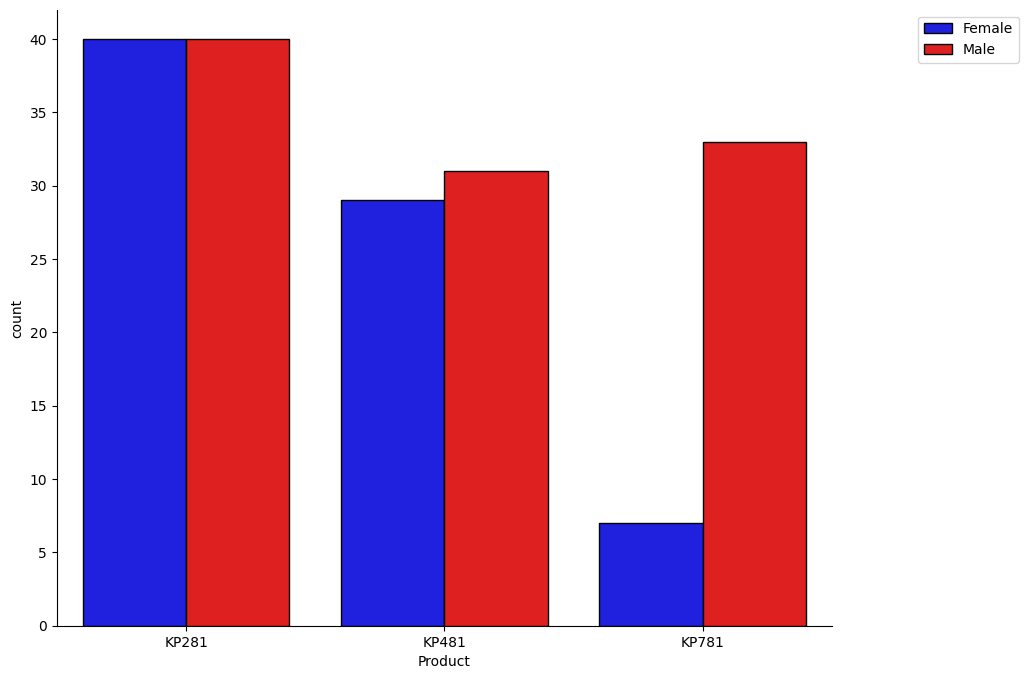

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product',y= 'count',data=df1,hue='Gender',edgecolor = 'black', palette=['blue', 'red'])
plt.legend(bbox_to_anchor=(1.25,1),loc='upper right')
sns.despine()
plt.show()

6. Product analysis with respect to age of the customers

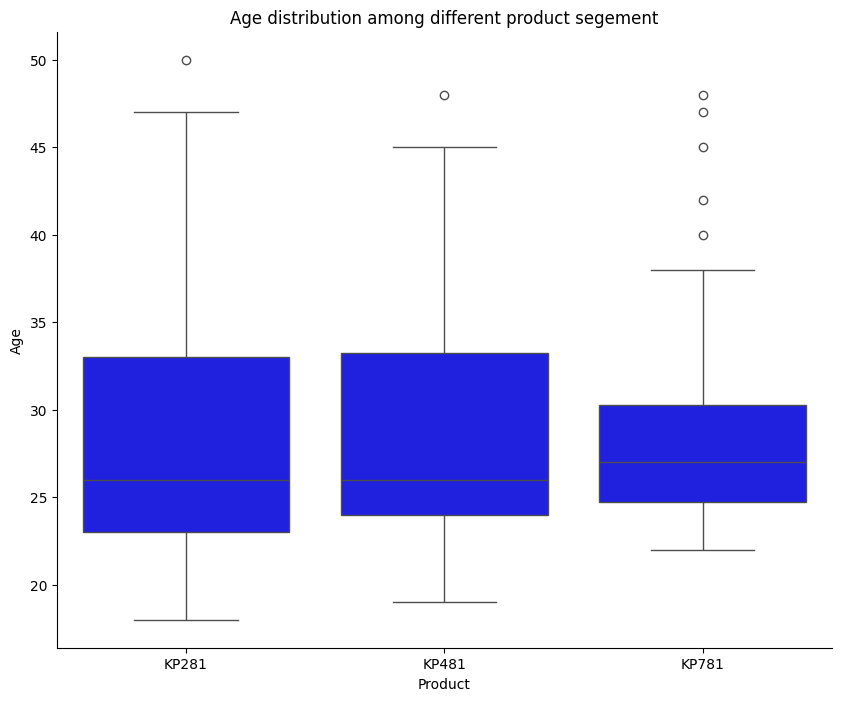

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x= 'Product',y='Age',data=aerofit,color='blue')
plt.title('Age distribution among different product segement')
sns.despine()
plt.show()

7. Average Income of people buying different models of aerofit treadmills

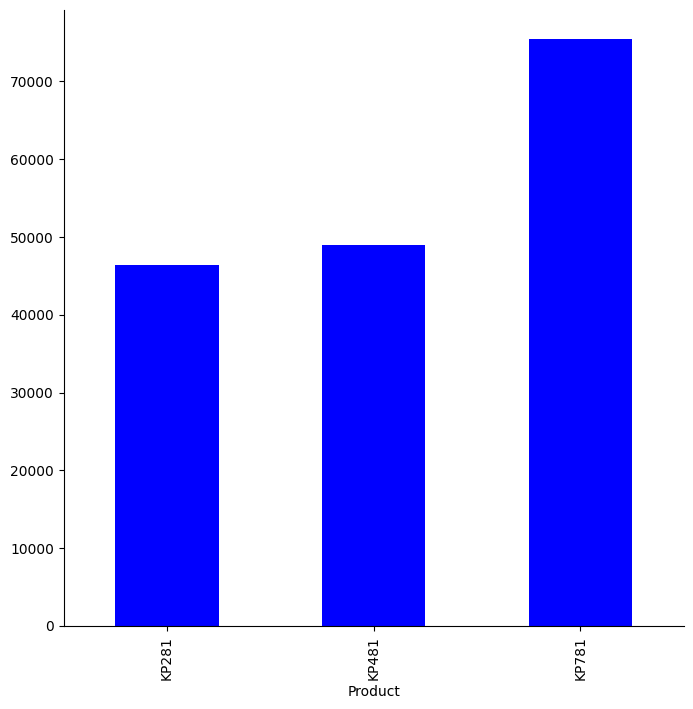

In [ ]:
plt.figure(figsize=(10,8))
avg_income=aerofit.groupby('Product')['Income'].mean()
avg_income.plot(kind='bar',figsize=(8,8),color='blue')
sns.despine()
plt.show()

In [ ]:
avg_usage= aerofit.groupby('Product')['Usage'].mean()


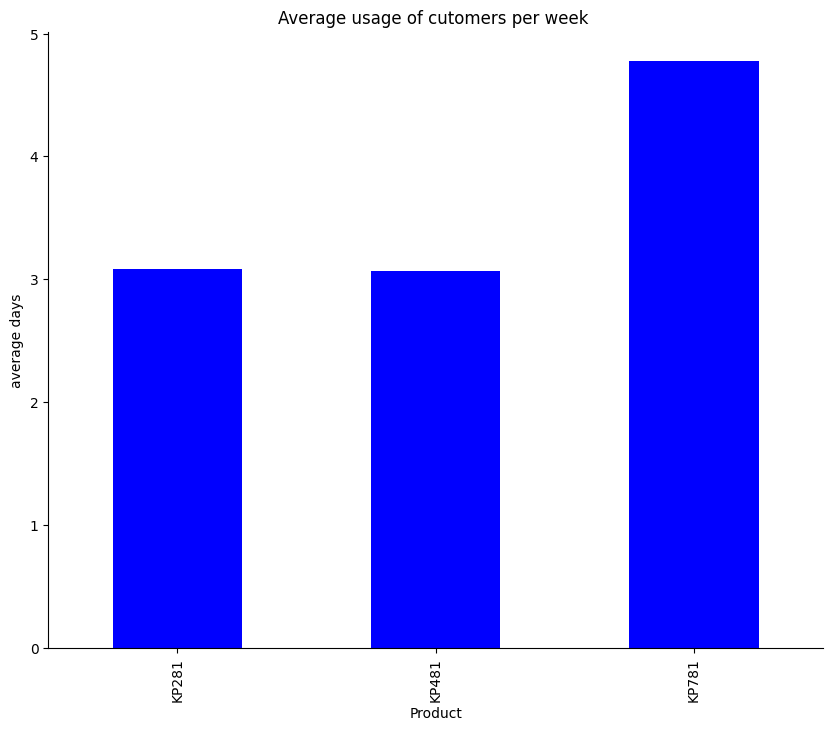

In [ ]:
avg_usage.plot(kind= 'bar',figsize=(10,8),color='blue')
plt.ylabel("average days")
plt.title("Average usage of cutomers per week ")
sns.despine()
plt.show()

In [ ]:
avg_fitness= aerofit.groupby('Product')['Fitness'].mean()


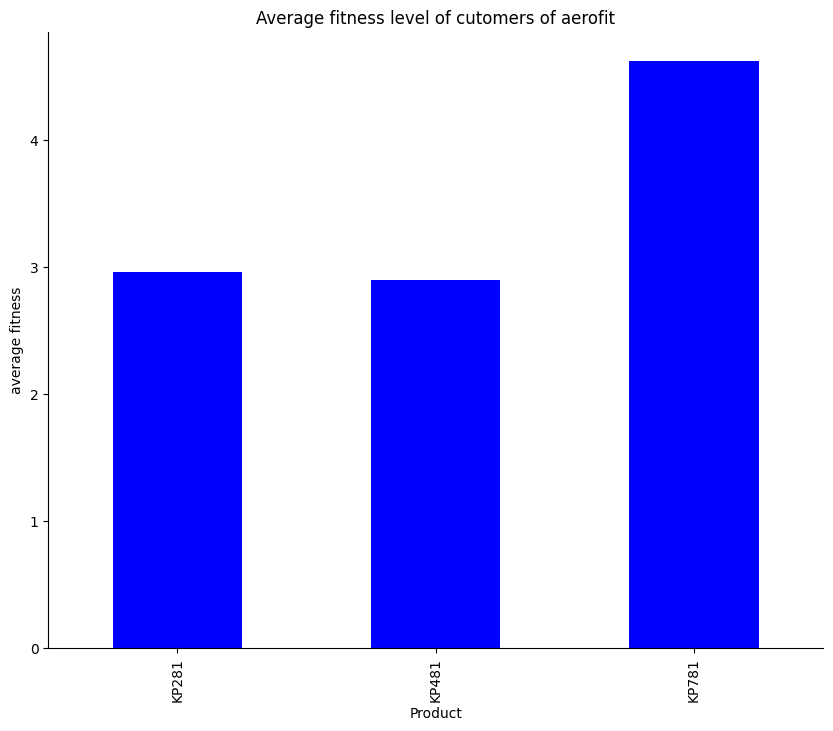

In [ ]:
avg_fitness.plot(kind= 'bar',figsize=(10,8),color='blue')
plt.ylabel("average fitness")
plt.title("Average fitness level of cutomers of aerofit")
sns.despine()
plt.show()

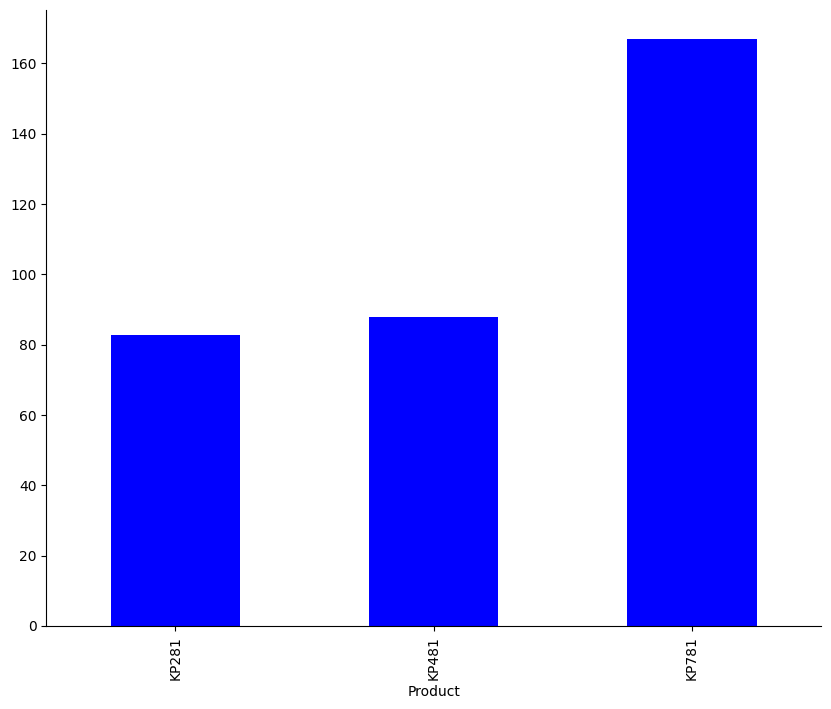

In [ ]:
avg_miles = aerofit.groupby('Product')['Miles'].mean()
avg_miles.plot(kind= 'bar',figsize=(10,8),color='blue')
sns.despine()
plt.show()

**Observations:**

*   People with high fitness level use the aerofit products more than **5 times** a week
*   People with high income levels are buying KP781 and these people tends to do more miles
* For KP281 we have equal number of customers for both genders(Male,Female),for KP481 we have male customers slightly more than female and for KP781 the number of male customers are far more than female customers.
* In the two product segements like KP281,KP481 they have almost the same gender ratio of customers but for KP781 there is a vast difference between female and male ratio. Mostly men are buying KP781.
* The age distribution for customers of KP281,KP481 is around the same level, most of the buyers for both the products are
of the same age, but for KP781 we can see a lot of people are of higher age.
* Most of the people buying KP281,KP481 have average income less than 50000, whereas the people buying KP781 have average income more than
70000
* The avearge usage of KP281,KP481 is less than 3 days a week, but those buying KP781 have avearge usage of 5 days a week.
* Average fitness level of customers of KP281,KP481 is around 3, whereas the customers buying KP781 have average fitness level
above 4



<h2>Conditional Probability</h2>

In [ ]:
p,s=aerofit['MaritalStatus'].value_counts()

In [ ]:
product_marital_status=pd.crosstab(index = aerofit['Product'],columns= aerofit['MaritalStatus'],normalize=True)*100
product_marital_status

MaritalStatus,Partnered,Single
Product,,
KP281,26.666667,17.777778
KP481,20.000000,13.333333
KP781,12.777778,9.444444


<Axes: xlabel='MaritalStatus', ylabel='Product'>

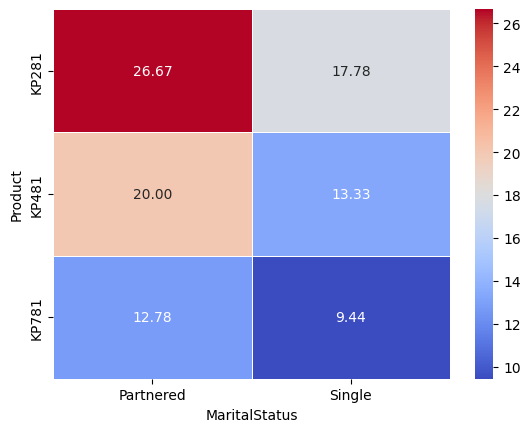

In [ ]:
sns.heatmap(product_marital_status,annot = True,cmap= 'coolwarm',fmt=".2f", linewidths=0.5)

<h2>Conditional and Marginal Probabilities for the following aerofit products</h2>
<ul><li>KP281</li>
<li>KP481</li>
<li>KP781</li>
</ul>

<h3>General Problem Statements that we will figure out using Probabilities</h3>
<ul>
    <li>Prob that a single customer visiting the store buys which treadmill</li>
    <li>Prob that a partenered customer visiting the store buys which treadmill</li>
    <li>Prob that person with income above 50000 buys which product</li>
    <li>Prob that person with income below 50000 buys which product</li>
    <li>Prob that a person with fitness score of 3 and above buys which treadmill</li>
    <li>Prob that a paerson with fitness level of below 3 buys which treadmill </li>
    <li>Prob that a person who runs/walks more than 80 miles a week buys a KP281 treadmill</li>
    
</ul>

In [ ]:
total_single =aerofit['MaritalStatus'].value_counts()['Single']
total_partnered = aerofit['MaritalStatus'].value_counts()['Partnered']

In [ ]:
print(f"total single customers - {total_single}")
print(f"total partnered customers - {total_partnered}")

total single customers - 73
total partnered customers - 107


In [ ]:
KP281_single= np.round(32/total_single,2)
KP481_single = np.round(24/total_single,2)
KP781_single = np.round(17/total_single,2)


In [ ]:
KP281_partnered= np.round(48/total_partnered,2)
KP481_partnered = np.round(36/total_partnered,2)
KP781_partnered = np.round(23/total_partnered,2)


In [ ]:
probability_df= pd.DataFrame({'Product': ['KP281','KP481','KP781'],
                            'Single': [KP281_single,KP481_single,KP781_single],
                             'Partnered': [KP281_partnered,KP481_partnered,KP781_partnered]})
probability_df.set_index('Product', inplace=True)
probability_df

,Single,Partnered
Product,,
KP281,0.44,0.45
KP481,0.33,0.34
KP781,0.23,0.21


<Figure size 1000x800 with 0 Axes>

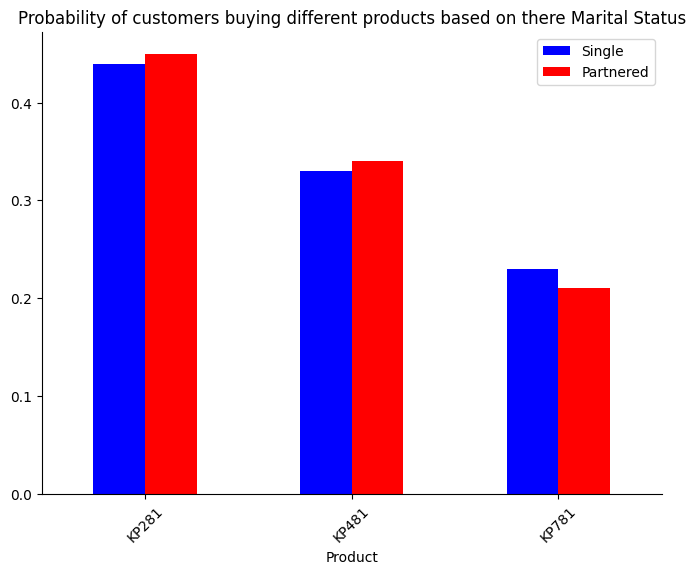

In [ ]:
plt.figure(figsize=(10,8))
probability_df.plot(kind='bar',figsize= (8,6),color=['blue','red'])
plt.xticks(rotation = 45)
plt.title('Probability of customers buying different products based on there Marital Status')
sns.despine()
plt.show()


<h3>Probability of people with income above 50000 buying which product</h3>

In [ ]:
income_df=aerofit[aerofit['Income'] > 50000]
income_df.groupby('Product')['Income'].count()

,Income
Product,
KP281,32
KP481,30
KP781,35


In [ ]:
aerofit['Product'].value_counts()


,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
KP281_above_50 = 32/80

In [ ]:
KP481_above_50 = 30/60

In [ ]:
KP781_above_50 = 35/40

In [ ]:
income_above_50 = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_above_50,KP481_above_50,KP781_above_50]})

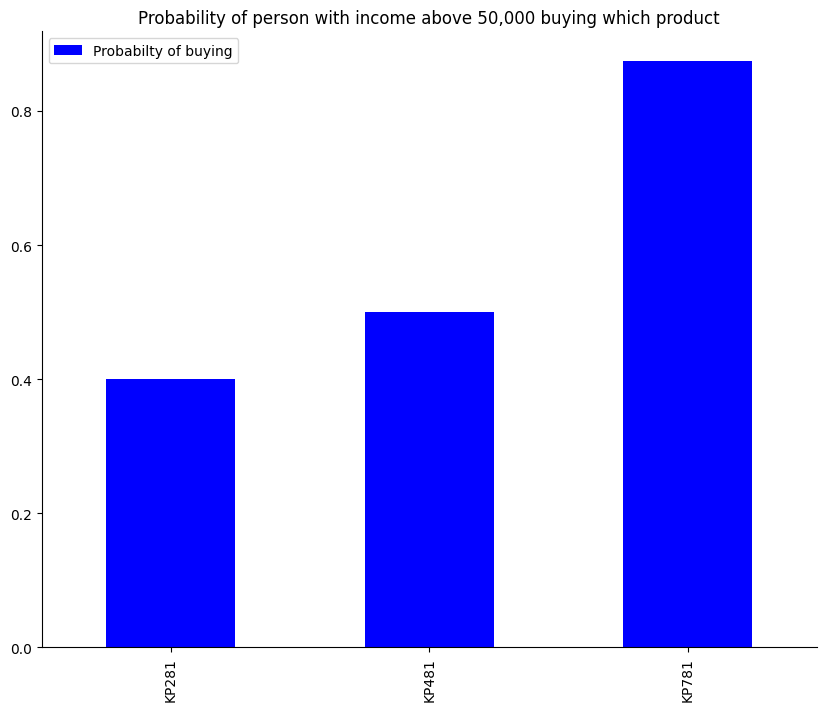

In [ ]:
x = np.arange(len(income_above_50))

income_above_50.plot(kind = 'bar',color='blue',figsize=(10,8))

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with income above 50,000 buying which product")
sns.despine()
plt.show()

In [ ]:
income_df_1=aerofit[aerofit['Income'] < 50000]
income_df_1.groupby('Product')['Income'].count()

,Income
Product,
KP281,48
KP481,30
KP781,5


In [ ]:
aerofit['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
KP281_below_50 = 48/80
KP481_below_50 = 60/80
KP781_below_50 = 5/80

In [ ]:
income_below_50 = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_below_50,KP481_below_50,KP781_below_50]})

<Figure size 800x600 with 0 Axes>

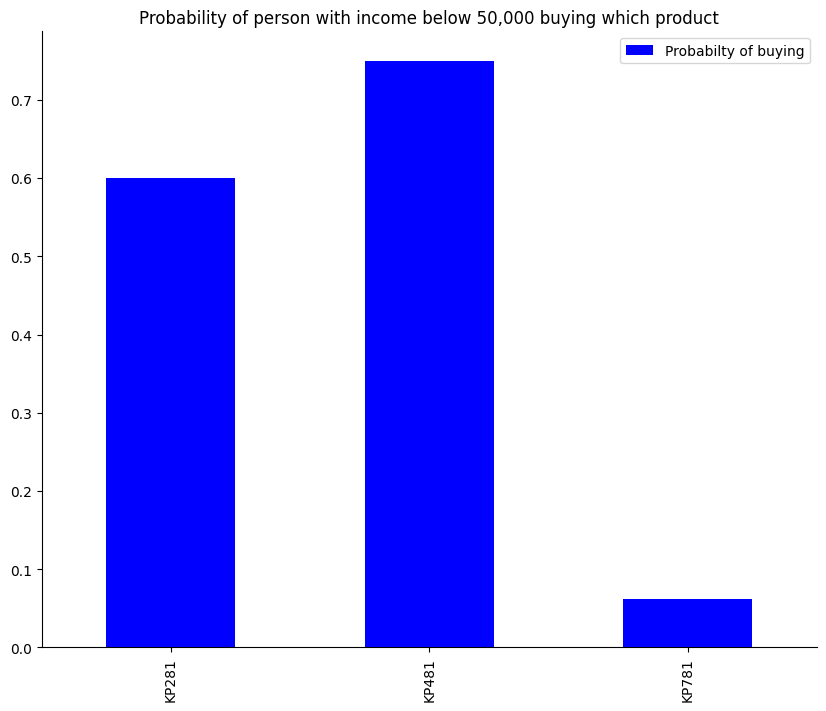

In [ ]:
x = np.arange(len(income_above_50))
plt.figure(figsize= (8,6))

income_below_50.plot(kind = 'bar',figsize=(10,8),color='blue')

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with income below 50,000 buying which product")
sns.despine()
plt.show()

In [ ]:
fitness_1= aerofit[aerofit['Fitness']<=3]
fitness_1.groupby('Product')['Fitness'].count()

,Fitness
Product,
KP281,69
KP481,52
KP781,4


In [ ]:
KP281_below_3= 69/80
KP481_below_3 = 52/60
KP781_below_3= 4/40

In [ ]:
rating_below_3 = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_below_3,KP481_below_3,KP781_below_3]})

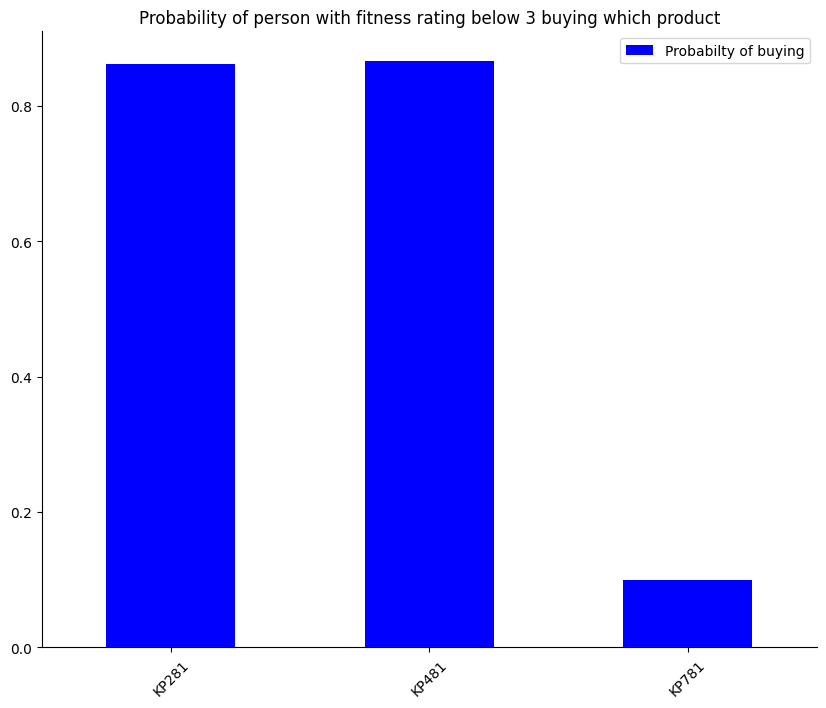

In [ ]:
x = np.arange(len(rating_below_3))
rating_below_3.plot(kind = 'bar',figsize=(10,8),color='blue')

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with fitness rating below 3 buying which product")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

In [ ]:
fitness_1= aerofit[aerofit['Fitness'] > 3]
fitness_1.groupby('Product')['Fitness'].count()

,Fitness
Product,
KP281,11
KP481,8
KP781,36


In [ ]:
KP281_above_3= 11/80
KP481_above_3 = 8/60
KP781_above_3 = 36/40

In [ ]:
rating_above_3 = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_above_3,KP481_above_3,KP781_above_3]})

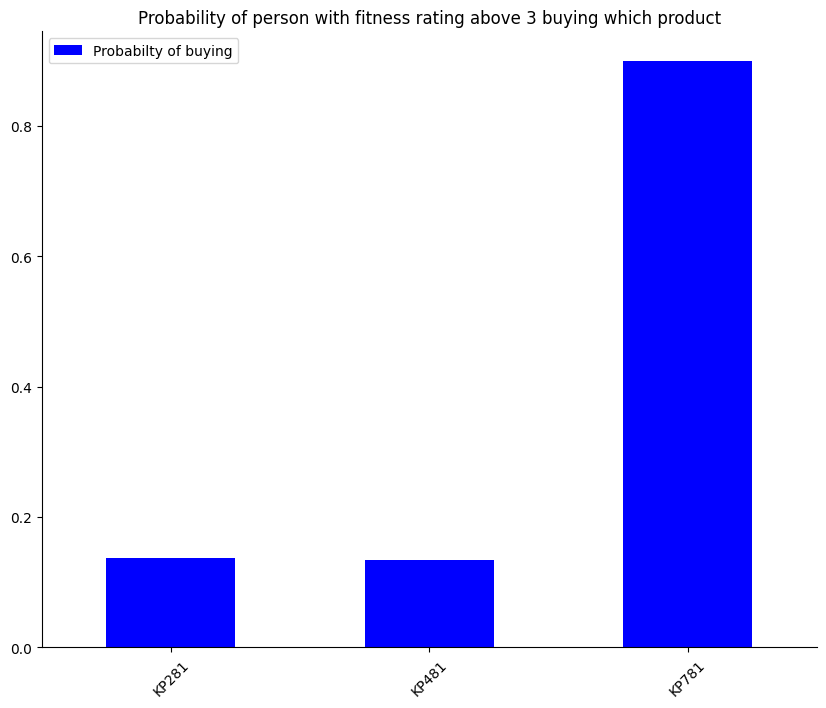

In [ ]:
x = np.arange(len(rating_above_3))


rating_above_3.plot(kind = 'bar',figsize=(10,8),color='blue')

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with fitness rating above 3 buying which product")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

In [ ]:
aerofit[aerofit['Miles']>103].groupby('Product')['Miles'].count()

,Miles
Product,
KP281,15
KP481,16
KP781,32


In [ ]:
KP281_miles = 15/80
KP481_miles = 16/60
KP781_miles = 32/40

In [ ]:
miles_above_avg = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_miles,KP481_miles,KP781_miles]})

<Figure size 800x600 with 0 Axes>

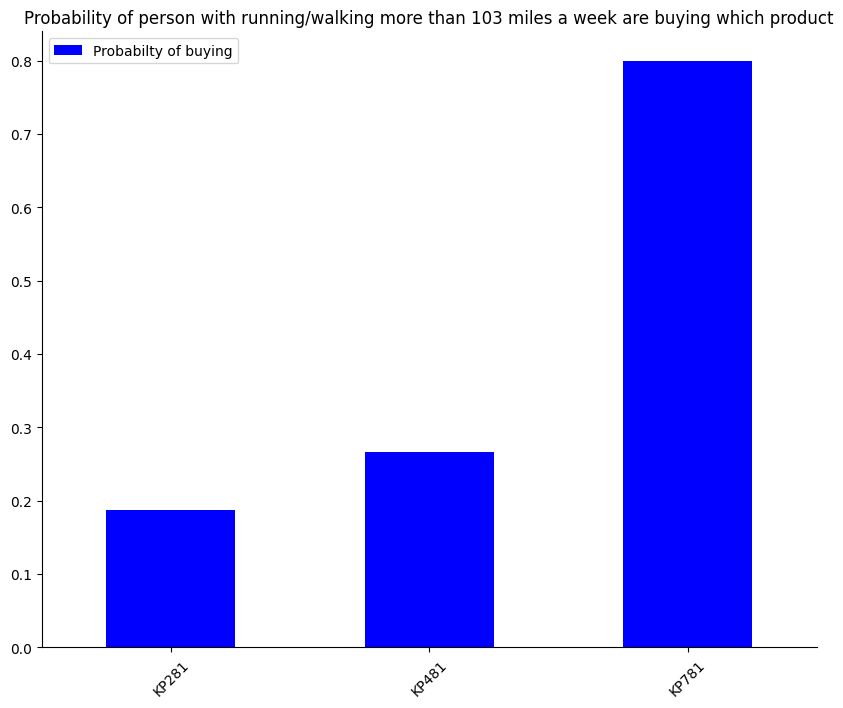

In [ ]:
x = np.arange(len(miles_above_avg))
plt.figure(figsize= (8,6))

miles_above_avg.plot(kind = 'bar',figsize=(10,8),color='blue')

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with running/walking more than 103 miles a week are buying which product")
plt.xticks(rotation = 45)
sns.despine()
plt.show()

In [ ]:
aerofit[aerofit['Miles']<103].groupby('Product')['Miles'].count()

,Miles
Product,
KP281,62
KP481,44
KP781,8


In [ ]:
KP281_low_miles = 62/80
KP481_low_miles = 44/60
KP781_low_miles = 8/40

In [ ]:
miles_below_avg = pd.DataFrame({'Product' :['KP281','KP481','KP781'],
                     'Probabilty of buying' : [KP281_low_miles,KP481_low_miles,KP781_low_miles]})

<Figure size 800x600 with 0 Axes>

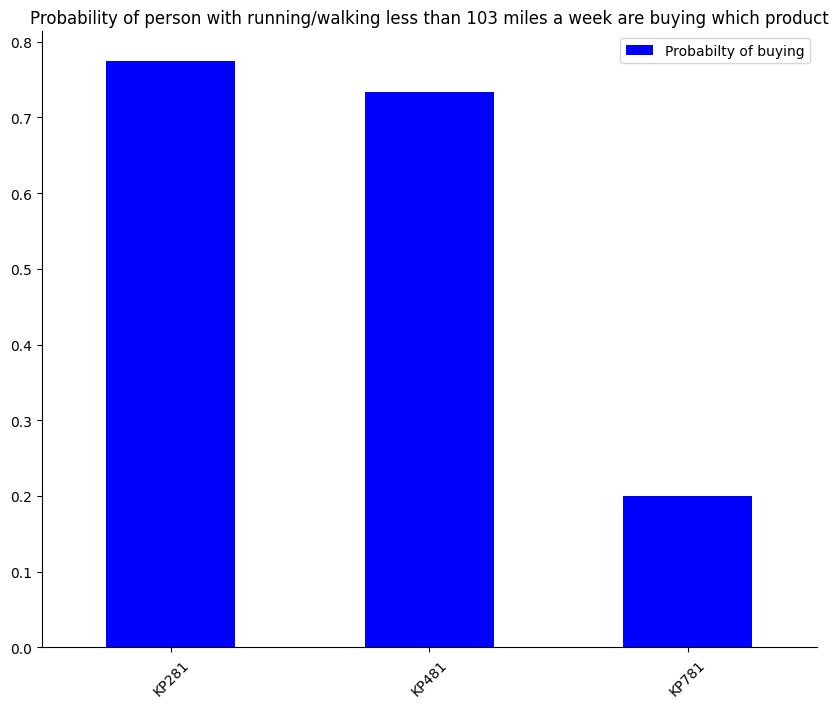

In [ ]:
x = np.arange(len(miles_below_avg))
plt.figure(figsize= (8,6))

miles_below_avg.plot(kind = 'bar',figsize=(10,8),color='blue')

plt.xticks(x, income_above_50['Product'])
plt.title("Probability of person with running/walking less than 103 miles a week are buying which product")
plt.xticks(rotation = 45)
sns.despine()
plt.show()


<h2>Business Insight</h2>
<h3>From the above analysis we can see some patterns in the data that can be helpful for the company </h3>
<ul>
    <li> The average age of the customers of aerofit is 28. </li>
    <li> Currently people who are beginner into fitness or who are doing less miles per week or those whose avearge usage per week is
         less than 3 days are buying KP281,KP481 mostly.</li>
    <li> Advanced users who are doing more miles per week or whose usage is more than 3 days a week are buying KP781.</li>
    <li> We can also point out that the average income of customers buying KP781 is more then the average income of customers buying the other two  products
    <LI> Aerofit should focus its marketing activities towards its female customers into buying high end products because most of there female
         customers are buying KP281 and KP481.</LI>
    
</ul>
<h2>Actionables for Business</h2>
<ul>
    <li> Aerofit should create a marketing campaign around spreading awareness for daily exercising, its overall mental and pyhsical health benefits.          That will create a demand pull for
         all its products but especially for its KP781 category. Which is the least sold and most expensive product category. </li>
    <li> The sales team should educate customers who are willing to buy the beginner grade product should consider buying a superior product,
         if not today but in near future.</li>
    <li> Most of the customers of aerofit are under 30. Company should give good after sales service so that they can retain there customers
         plus they can be the potential customers for there expensive category as there income increases.</li>
</ul>